In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images to a 1D array (28x28 to 784)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 37s 48ms/step - loss: 0.2136 - accuracy: 0.9339 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 2/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0457 - val_accuracy: 0.9864
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0463 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 5/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0365 - val_accuracy: 0.9893


In [ ]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions on a few test images
predictions = model.predict(test_images[:5])




313/313 [==============================] - 2s 7ms/step - loss: 0.0294 - accuracy: 0.9906
Test accuracy: 0.9905999898910522
1/1 [==============================] - 0s 78ms/step


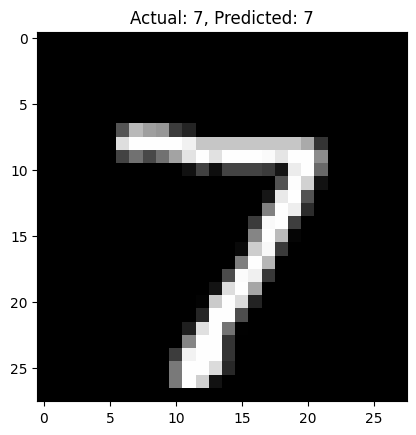

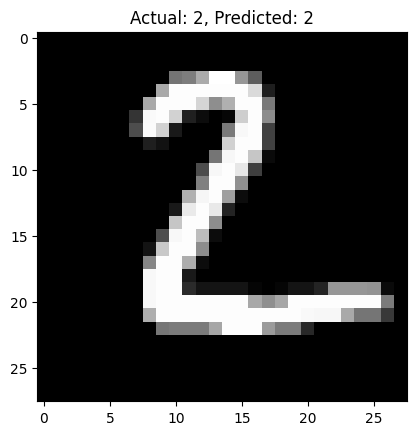

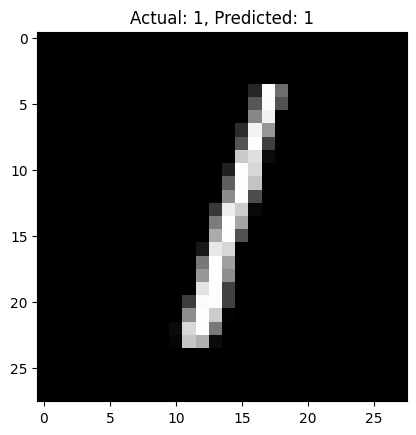

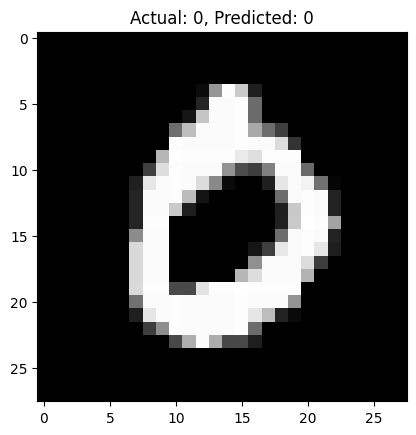

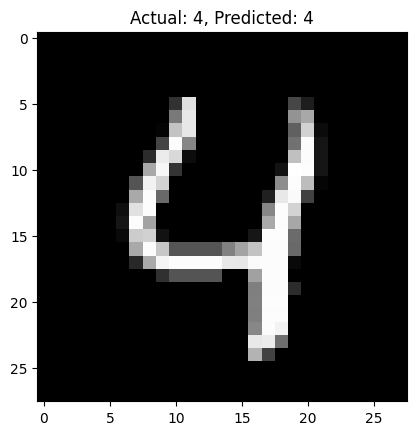

In [ ]:
# Visualize the predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {np.argmax(test_labels[i])}, Predicted: {np.argmax(predictions[i])}')
    plt.show()